<a href="https://colab.research.google.com/github/MarkMinia/Project6/blob/main/KAGGLE_TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# vocab key

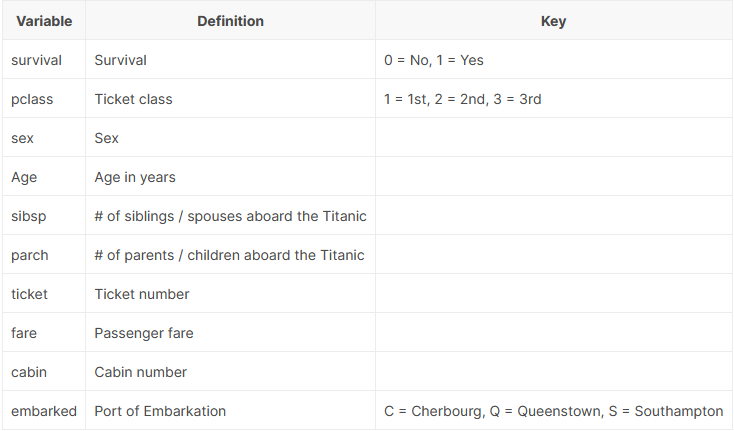

Variable	Definition	Key
survival 	Survival 	0 = No, 1 = Yes
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	Sex 	
Age 	Age in years 	
sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / children aboard the Titanic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [ ]:
# These will be used for the data wrangling
import pandas as pd
import numpy as np
from collections import Counter

# These will be used for the data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# These will be used to create thmachine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# This will be used to evaluate the machine learning models
from sklearn.model_selection import cross_val_score

# This will be used to remove warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# file upload
from google.colab import files
file = files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
# create dataframes to begin data wrangling
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('gender_submission.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.shape

(891, 12)

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test.shape

(418, 11)

Above, I imported the datasets from Kaggle. There is a difference between the training set and the testing set. The columns are virtually the same, except the training set has the 'Survived' column. This is because that column will be used to train the model, which will then be used to predict the survival within the test dataset.

In [ ]:
sample.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


This sample submission is what we're looking to achieve in the end.

In [ ]:
# reviewing total rows that are null/non-null
train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

By looking at the shape of each dataset from earlier, I can see that the number of entries/rows match for most, but there are a few columns that do not. In the training set, the 'Age' and 'Cabin' columns have rows with nulls. In the testing set, the 'Age', 'Fare', and 'Cabin' columns have rows with nulls. The rest of the columns do not have missing values.

In [ ]:
# A look at total missing values by ascending order for train set
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
# A look at total missing values by ascending order for test set
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

The above codes display how much null values there are in each column by ascending order. This gives a clearer depiction of how much data is actually missing.

In [ ]:
# Summary statistic for train set
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Summary statistic for test set
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Total value count by gender
train['Sex'].value_counts(dropna = False)

male      577
female    314
Name: Sex, dtype: int64

This code counts the values of each gender, excluding rows containing missing values. Males outnumbered the females. 

In [ ]:
# Mean survival rate by gender
train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

NameError: ignored

This code calculates the mean survival rate of each gender using the groupby function while the mean function is applied to the Survived column. The female passengers had a higher rate of survival vs. males. What very likely contributes to this is the protocol that was in effect at the time, which was to save the women and children, first. 

Text(0.5, 1.0, 'Mean Survival Rate')

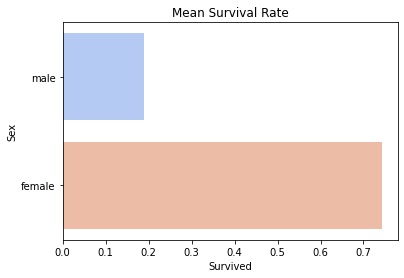

In [ ]:
sns.barplot(x = 'Survived', y = 'Sex', data = train, ci = None, palette = 'coolwarm')
plt.ylabel('Sex')
plt.title('Mean Survival Rate')

In [ ]:
# Total value count by passenger class
train['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

For this code, we look at the passengers grouped by first, second, and third class. The third class had the highest number of passengers, followed by the first class, then the second class.

In [ ]:
# Mean survival rate by passenger class
train[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


The same function above was used to calculate the mean survival rate for each class. The first class passengers had the highest survival rate, followed by second class, then third. The cause of this is likely due to priority/attention being given to the wealthy.

Text(0.5, 1.0, 'Mean Survival Rate')

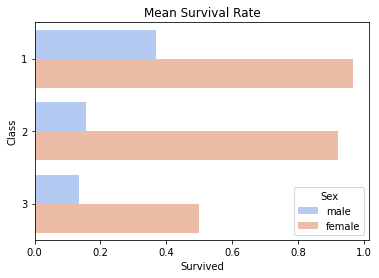

In [ ]:
sns.barplot(x = 'Survived', y = 'Pclass', hue = 'Sex', data = train, orient = 'h', ci = None, palette = 'coolwarm')
plt.ylabel('Class')
plt.title('Mean Survival Rate')

The same graph was used, but this time the gender was added to visualize how the chances for survival were considerably higher if the passenger was a female and of higher class. 

In [ ]:
# Total value count by departing location
train['Embarked'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

Now, let's look at the location of where they emabrked. Most passengers began their trip from Southampton, Cherbourg came in second, then Queenstown. 

In [ ]:
# Mean survival rate by departing location
train[['Embarked', 'Survived']].groupby('Embarked', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


According to the mean survival rate, passengers that embarked from Cherbourg had a higher chance of survival, while Southhampton had the least. I assume that the reason for that is because majority of the passengers that embarked from Southhampton were third class while the majority that embarked from Cherbourg were first class. This assumption is based on the previous graph that shows being in a higher class improved your odds of being alive. 

Text(0.5, 1.0, 'Mean Survival Rate')

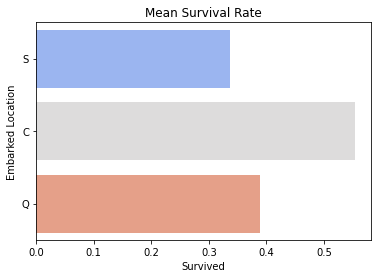

In [ ]:
sns.barplot(x = 'Survived', y = 'Embarked', data = train, ci = None, palette = 'coolwarm')
plt.ylabel('Embarked Location')
plt.title('Mean Survival Rate')

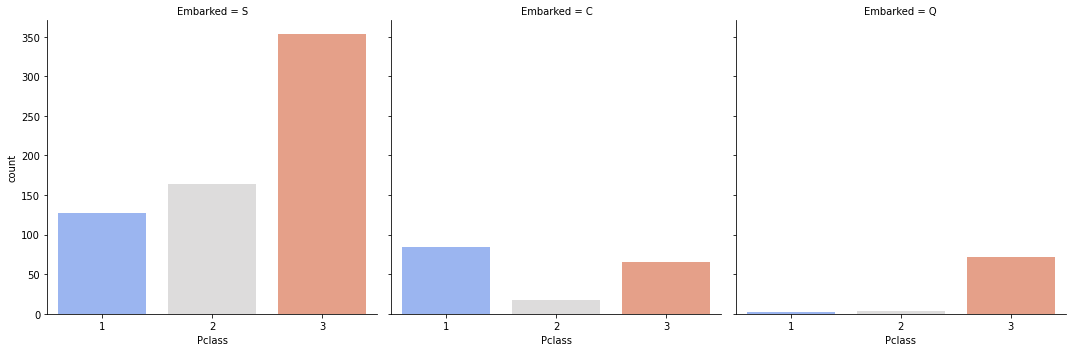

In [ ]:
# Total value count by passenger class and departing location
sns.factorplot('Pclass', col = 'Embarked', data = train, kind = 'count', palette = 'coolwarm')

From this chart, we see that most of Southhampton passengers were third class, which correlates to the lower survival rate for that specific class. Majority of the Cherbourg passengers were first class, which is also in line with the observation that first class passengers had a higher probability of surviving. 

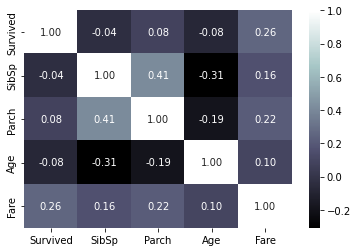

In [ ]:
# Heatmap to find correlation with survival
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'bone')

This code creates a heatmap that displayes the correlation coefficient in each box up to 2 decimal points. From this chart, eacch feature is paired with another and shows how correlated they are. Since we are concerned about who survived, among each feature that 'Survived' is paired with, it has the highest correlation with fare. This makes sense because a higher fare is assumed to be someone in first class, which is the group that had the highest chance of survival.

In [ ]:
# Total value counts by number of siblings/spouses
train['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
# Mean survival rate by number of siblings/spouses
train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Text(0.5, 1.0, 'Mean Survival Rate')

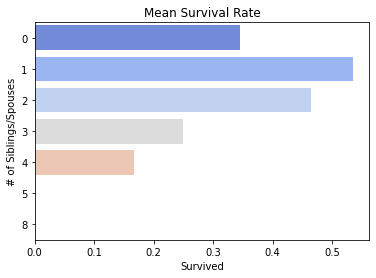

In [ ]:
sns.barplot(x = 'Survived', y = 'SibSp', data = train, orient = 'h', ci = None, palette = 'coolwarm')
plt.ylabel('# of Siblings/Spouses')
plt.title('Mean Survival Rate')

Using the codes from earlier and plugging in 'SibSp', we can see how the survival rate changes depending on the number of siblings/spouses a passenger had aboard with him/her. 

In [ ]:
# Total value count by number of parents/children
train['Parch'].value_counts(dropna = False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
# Mean survival rate by number of parents/children
train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Mean Survival Rate')

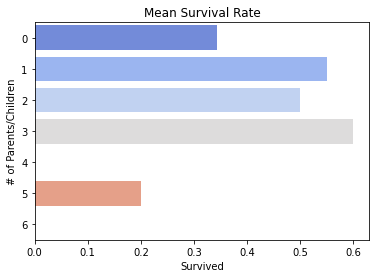

In [ ]:
sns.barplot(x = 'Survived', y = 'Parch', data = train, orient = 'h', ci = None, palette = 'coolwarm')
plt.ylabel('# of Parents/Children')
plt.title('Mean Survival Rate')

Using the same codes from earlier, 'SibSp' and 'Parch' were plugged. These features essentially tell how big of a party you were traveling with. 'SibSp' is the number of siblings/spouses and 'Parch' is the number of parents/children. Looking at the graphs, traveling the Titanic solo or with as few people as possible increased the odds of surviving, while a bigger family meant a lower chance of survival. 

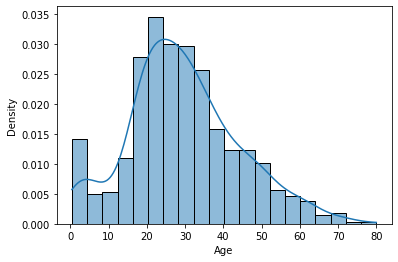

In [ ]:
# Age distribution for train set
sns.histplot(train['Age'], kde = True, stat = "density")

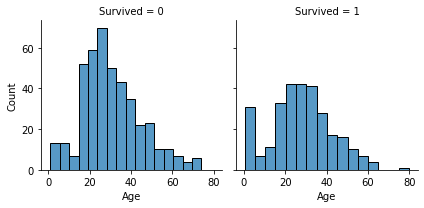

In [ ]:
# # Age distribution by survival for train set
a = sns.FacetGrid(train, col = 'Survived')
a.map(sns.histplot, 'Age')

A histplot was used because the earlier graphs were best for features with few categories, but the 'Age' column has a wide range from 0 up to 80. TheFacetGrid shows the age distribution for those who survived vs. those who did not. I noticed that there is a spike near age 0 for the Survived distribution, which is due to the priority that was given when evacuating the ship. 

Text(0, 0.5, 'Passenger Fare Distribution')

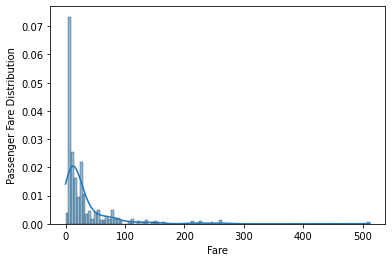

In [ ]:
# Fare distribution for train set
sns.histplot(train['Fare'], kde = True, stat = "density")
plt.ylabel('Passenger Fare Distribution')

The hisplot was used, again, due to the wide range of fares. There was a large amount of cheap tickets bought for this trip, but that's because the third class was larger than the first and second class combined. 

In [ ]:
# Drop values
train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

'Cabin' contained a large amount of missing values, but I decided cabin features wasn't going to be necessary for the analysis, along with 'Ticket'. This eliminates a good chunk of missing values to impute.

In [ ]:
train.isnull().sum().sort_values(ascending = False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [ ]:
# Find mode for embarked column
mode = train['Embarked'].dropna().mode()[0]
print(mode)

S


In [ ]:
# Fill missing values with mode
train['Embarked'].fillna(mode, inplace = True)

In [ ]:
# Find median for age column
median = train['Age'].dropna().median()
print(median)

28.0


In [ ]:
# Fill missing values with median
train['Age'].fillna(median, inplace = True)

In [ ]:
test.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

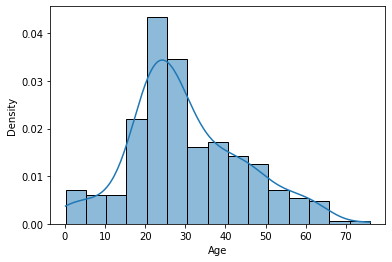

In [ ]:
# Age distribution for test set
sns.histplot(test['Age'], kde = True, stat = "density")

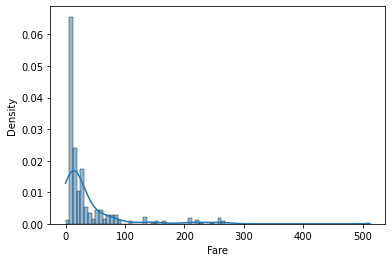

In [ ]:
# Fare distribution for test set
sns.histplot(test['Fare'], kde = True, stat = "density")

In [ ]:
# Find median for age column
median_2 = test['Age'].dropna().median()
print(median_2)

27.0


In [ ]:
# Fill missing values with median
test['Age'].fillna(median_2, inplace = True)

In [ ]:
# Find median for fare column
median_3 = test['Fare'].dropna().median()
print(median_3)

14.4542


In [ ]:
# Fill missing values with median
test['Fare'].fillna(median_3, inplace = True)

Mode and median was used to impute missing values for 'Age', 'Embarked', and 'Fare'. Mode for 'Embarked' because the values are categorical. Median was used for the others because the mean would be skewed from looking at the distribution graphs.

In [ ]:
# COmbine train and test set
combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


training and test dataset are combined, but will be seperated later on. The next steps will involve encoding the values because machine learning models require numeric values.

In [ ]:
# Split title and name
combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [ ]:
combine['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [ ]:
# Drop name column
combine = combine.drop('Name', axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1.0,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1.0,3,female,26.0,0,0,7.9250,S,Miss
3,4,1.0,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0.0,3,male,35.0,0,0,8.0500,S,Mr


In [ ]:
# Simplify and reduce number of titles to common ones
combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 
                                            'Don', 'Capt', 'the Countess','Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

In [ ]:
# Change tital and embarked values to numeric
combine = pd.get_dummies(combine, columns = ['Title'])
combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em')
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,male,22.0,1,0,7.2500,0,0,1,0,0,0,0,1
1,2,1.0,1,female,38.0,1,0,71.2833,0,0,0,1,0,1,0,0
2,3,1.0,3,female,26.0,0,0,7.9250,0,1,0,0,0,0,0,1
3,4,1.0,1,female,35.0,1,0,53.1000,0,0,0,1,0,0,0,1
4,5,0.0,3,male,35.0,0,0,8.0500,0,0,1,0,0,0,0,1


The title and names were split because the names won't be necessary in identifying the passenger, and so the names were dropped. The titles were then assigned numbers using get_dummies. Same goes for the embarked locations.

In [ ]:
# Change gender to numeric
combine['Sex'] = combine['Sex'].map({'male': 0, 'female': 1})
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,22.0,1,0,7.2500,0,0,1,0,0,0,0,1
1,2,1.0,1,1,38.0,1,0,71.2833,0,0,0,1,0,1,0,0
2,3,1.0,3,1,26.0,0,0,7.9250,0,1,0,0,0,0,0,1
3,4,1.0,1,1,35.0,1,0,53.1000,0,0,0,1,0,0,0,1
4,5,0.0,3,0,35.0,0,0,8.0500,0,0,1,0,0,0,0,1


Gender was assigned either a 0 or 1.

In [ ]:
# Change fares to ordinal values
combine['FareBand'] = pd.cut(combine['Fare'], 4)
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [ ]:
combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3

In [ ]:
combine['Fare'] = combine['Fare'].astype('int')

In [ ]:
combine = combine.drop('FareBand', axis = 1)

In [ ]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,22.0,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,38.0,1,0,3,0,0,0,1,0,1,0,0
2,3,1.0,3,1,26.0,0,0,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,35.0,1,0,3,0,0,0,1,0,0,0,1
4,5,0.0,3,0,35.0,0,0,3,0,0,1,0,0,0,0,1


The fares were assigned ordinals to provide a set order or scale.

In [ ]:
# Change age to ordinal values
combine['AgeBand'] = pd.cut(combine['Age'], 5)
combine[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by = 'AgeBand')

,AgeBand,Survived
0,"(0.0902, 16.136]",0.550000
1,"(16.136, 32.102]",0.344168
2,"(32.102, 48.068]",0.404255
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [ ]:
combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034 , 'Age'] = 4

In [ ]:
combine['Age'] = combine['Age'].astype('int')

In [ ]:
combine = combine.drop('AgeBand', axis = 1)

In [ ]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,1,0,3,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,0,0,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,1,0,3,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,0,0,3,0,0,1,0,0,0,0,1


The same method done to fares was done to the ages.

In [ ]:
# Split the dataframe back to the train and test set
train = combine[:len(train)]
test = combine[len(train):]

The combine dataframe was then split back into the train and test set.

In [ ]:
train = train.drop('PassengerId', axis = 1)
train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1,1,1,2,1,0,3,0,0,0,1,0,1,0,0
2,1,3,1,1,0,0,3,0,1,0,0,0,0,0,1
3,1,1,1,2,1,0,3,0,0,0,1,0,0,0,1
4,0,3,0,2,0,0,3,0,0,1,0,0,0,0,1


In [ ]:
test = test.drop('Survived', axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
891,892,3,0,2,0,0,3,0,0,1,0,0,0,1,0
892,893,3,1,2,1,0,3,0,0,0,1,0,0,0,1
893,894,2,0,3,0,0,3,0,0,1,0,0,0,1,0
894,895,3,0,1,0,0,3,0,0,1,0,0,0,0,1
895,896,3,1,1,1,1,3,0,0,0,1,0,0,0,1


In [ ]:
X = train.drop(columns = ['Survived'])
y = train[['Survived']]

In [ ]:
# Train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
# Train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.333, random_state = 42)

train, test, split was then applied in preparation for the machine learning models.

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

81.8

In [ ]:
# Support Vector Machines
svc = SVC()
svc.fit(X, y)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

82.25

In [ ]:
# K-nearest Neighbors
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

83.15

In [ ]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

43.15

In [ ]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

75.96

In [ ]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

82.25

In [ ]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

80.22

In [ ]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

88.31

In [ ]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

88.31

In [ ]:
# Create dataframe with training accuracy for comparison
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree,]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,88.31
1,Decision Tree,88.31
2,KNN,83.15
3,Support Vector Machines,82.25
4,Linear SVC,82.25
5,Logistic Regression,81.80
6,Stochastic Gradient Decent,80.22
7,Perceptron,75.96
8,Naive Bayes,43.15


In [ ]:
# Cross-validate maching learning models
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())

In [ ]:
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y_train, scoring = 'accuracy', cv = 10))

In [ ]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [ ]:
# Create dataframe to compare accuracy
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.817879,0.037541,Support Vector Machines
1,0.808939,0.052650,Random Forest
2,0.806667,0.044364,Logistic Regression
3,0.806616,0.044833,KNN
4,0.806515,0.049566,Linear SVC
5,0.802172,0.061095,Decision Tree
6,0.750455,0.080220,Perceptron
7,0.712374,0.077194,Stochastic Gradient Descent
8,0.431566,0.036840,Gausian Naive Bayes


Support Vector Machines would be the top choice. It performed fairly well on the test set by scoring at 82 percent. With the cross validation it achieved the highest mean and second to smallest standard deviation.